# Import Libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read HTML tables into dataframe to get stats for each player

In [15]:
url_kobe = "https://www.basketball-reference.com/players/b/bryanko01.html"
kobe = pd.read_html(url_kobe)

url_shaq = "https://www.basketball-reference.com/players/o/onealsh01.html"
shaq = pd.read_html(url_shaq)

# Create individual dataframes for regular season and playoffs for each player

In [16]:
#Create regular season/playoffs dataframes for Kobe
kobe_reg_season = kobe[0] #gets data from 1st table of the url for Kobe
kobe_playoffs = kobe[1] #gets data from 2nd table of the url for Kobe
#Create regular season/playoffs dataframes for Shaq
shaq_reg_season = shaq[0] #gets data from 1st table of the url for Shaq
shaq_playoffs = shaq[1] #gets data from the 2nd table of the url fo Shaq

# Get appropriate list of seasons for analysis

In [17]:
#List of seasons from when both players joined the Lakers up through the championship run
seasons = ["1996-97","1997-98","1998-99","1999-00","2001-02","2002-03"]

# Create final dataframes to be used for time-series plot

In [18]:
#Subset regular season data frames to get only necessary fields for analysis
shaq_reg_season_new = shaq_reg_season[["Season","PTS"]]
kobe_reg_season_new = kobe_reg_season[["Season","PTS"]]
#Ensure final regular season dataframes are limited to list of seasons created in previous cell
shaq_reg_season_final = shaq_reg_season_new[shaq_reg_season_new["Season"].isin(seasons)] 
kobe_reg_season_final = kobe_reg_season_new[kobe_reg_season_new["Season"].isin(seasons)]
#Subset playoffs dataframs to get only necessary fields for analysis
shaq_playoffs_new = shaq_playoffs[["Season","PTS"]]
kobe_playoffs_new = kobe_playoffs[["Season","PTS"]]
#Ensure final playoffs dataframes are limited to list of seasons created in previous cell
shaq_playoffs_final = shaq_playoffs_new[shaq_playoffs_new["Season"].isin(seasons)]
kobe_playoffs_final = kobe_playoffs_new[kobe_playoffs_new["Season"].isin(seasons)]

# Create plot for time-series visualization

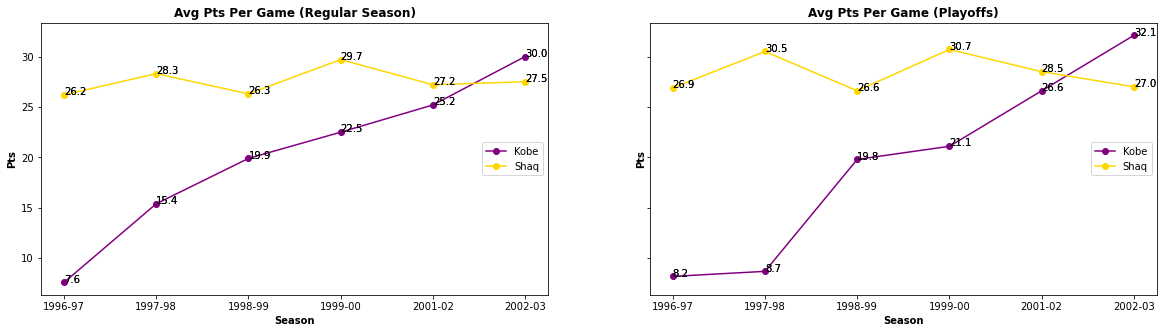

In [19]:
#Set up figure and axes for plot
fig, ax = plt.subplots(1,2, figsize=(20,5), sharey=True)

#Create plot for regular season stats
ax[0].plot(kobe_reg_season_final["Season"], kobe_reg_season_final["PTS"], marker="o", color="purple")
ax[0].plot(shaq_reg_season_final["Season"], shaq_reg_season_final["PTS"], marker="o", color="gold")
ax[0].set_xlabel("Season", fontweight="bold")
ax[0].set_ylabel("Pts", fontweight="bold")
ax[0].set_title("Avg Pts Per Game (Regular Season)", fontweight="bold")
ax[0].legend(["Kobe", "Shaq"], loc="center right")

#Add values to data points
for col in kobe_reg_season_final.columns:
    for id, val in enumerate(kobe_reg_season_final["PTS"]):
        ax[0].text(id, val, str(val))
        
for col in shaq_reg_season_final.columns:
    for id, val in enumerate(shaq_reg_season_final["PTS"]):
        ax[0].text(id, val, str(val))

#Create plot for playoff stats
ax[1].plot(kobe_playoffs_final["Season"], kobe_playoffs_final["PTS"], marker="o", color="purple")
ax[1].plot(shaq_playoffs_final["Season"], shaq_playoffs_final["PTS"], marker="o", color="gold")
ax[1].set_xlabel("Season", fontweight="bold")
ax[1].set_ylabel("Pts", fontweight="bold")
ax[1].set_title("Avg Pts Per Game (Playoffs)", fontweight="bold")
ax[1].legend(["Kobe", "Shaq"], loc="center right")

#Add value to data points
for col in kobe_playoffs_final.columns:
    for id, val in enumerate(kobe_playoffs_final["PTS"]):
        ax[1].text(id, val, str(val))
        
for col in shaq_playoffs_final.columns:
    for id, val in enumerate(shaq_playoffs_final["PTS"]):
        ax[1].text(id, val, str(val))
        
        
#Display plot        
plt.show()